## EXPLORATORY DATA ANALYSIS ON A DATASET
Objective:
The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.
Dataset:

1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
3.	FM - May indicate "Fetal Movements" detected by the monitor.
4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
6.	DS - May represent "Decelerations Short" or decelerations of brief duration.
7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.
10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
11.	MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.


Tools and Libraries:

●	Python or R programming language
●	Data manipulation libraries 
●	Data visualization libraries (Matplotlib and Seaborn in Python)
●	Jupyter Notebook for documenting your analysis


Tasks:

1.	Data Cleaning and Preparation:
   
●	Load the dataset into a DataFrame or equivalent data structure.
●	Handle missing values appropriately (e.g., imputation, deletion).
●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
●	Detect and treat outliers if necessary.

2.	Statistical Summary:
   
●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
●	Highlight any interesting findings from this summary.

3.	Data Visualization:
   
●	Create histograms or boxplots to visualize the distributions of various numerical variables.
●	Use bar charts or pie charts to display the frequency of categories for categorical variables.
●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

4.	Pattern Recognition and Insights:
   
●	Identify any correlations between variables and discuss their potential implications.
●	Look for trends or patterns over time if temporal data is available.

5.	Conclusion:
    
●	Summarize the key insights and patterns discovered through your exploratory analysis.
●	Discuss how these findings could impact decision-making or further analyses.



## 1. Data Cleaning and Preparation

#### Load the dataset

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\EDA1\EDA1\Cardiotocographic.csv")

# Display the first few rows of the dataset
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


#### Handle missing values

In [5]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., imputation with mean or median, or deletion)
df = df.fillna(df.median())


LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


#### Identify and correct inconsistencies in data types

In [7]:
# Check data types
print(df.dtypes)

# Convert any numerical values stored as strings to numerical types
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')


LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


#### Detect and treat outliers

In [9]:
import numpy as np

# Detect outliers using Z-score
from scipy.stats import zscore

z_scores = np.abs(zscore(df))
outliers = (z_scores > 3).all(axis=1)
df = df[~outliers]


## 2. Statistical Summary

#### Provide a statistical summary

In [10]:
# Statistical summary for each variable
summary = df.describe().transpose()
summary['median'] = df.median()
summary['IQR'] = summary['75%'] - summary['25%']

# Display the summary
print(summary)


           count        mean        std         min         25%         50%  \
LB        2126.0  133.340204  11.214379   51.842487  126.000000  133.000000   
AC        2126.0    0.003204   0.004373   -0.019284    0.000000    0.001634   
FM        2126.0    0.009894   0.067540   -0.480634    0.000000    0.000000   
UC        2126.0    0.004391   0.003340   -0.014925    0.001851    0.004484   
DL        2126.0    0.001895   0.003343   -0.015393    0.000000    0.000000   
DS        2126.0    0.000002   0.000141   -0.001353    0.000000    0.000000   
DP        2126.0    0.000173   0.000836   -0.005348    0.000000    0.000000   
ASTV      2126.0   46.995984  18.813973  -63.000000   32.000000   49.000000   
MSTV      2126.0    1.364378   1.173632   -6.600000    0.700000    1.200000   
ALTV      2126.0   10.285964  21.205041  -91.000000    0.000000    0.000000   
MLTV      2126.0    8.276147   7.734851  -50.700000    4.600000    7.400000   
Width     2126.0   70.395387  42.720508 -174.000000 

## 3. Data Visualization

#### Create histograms or boxplots

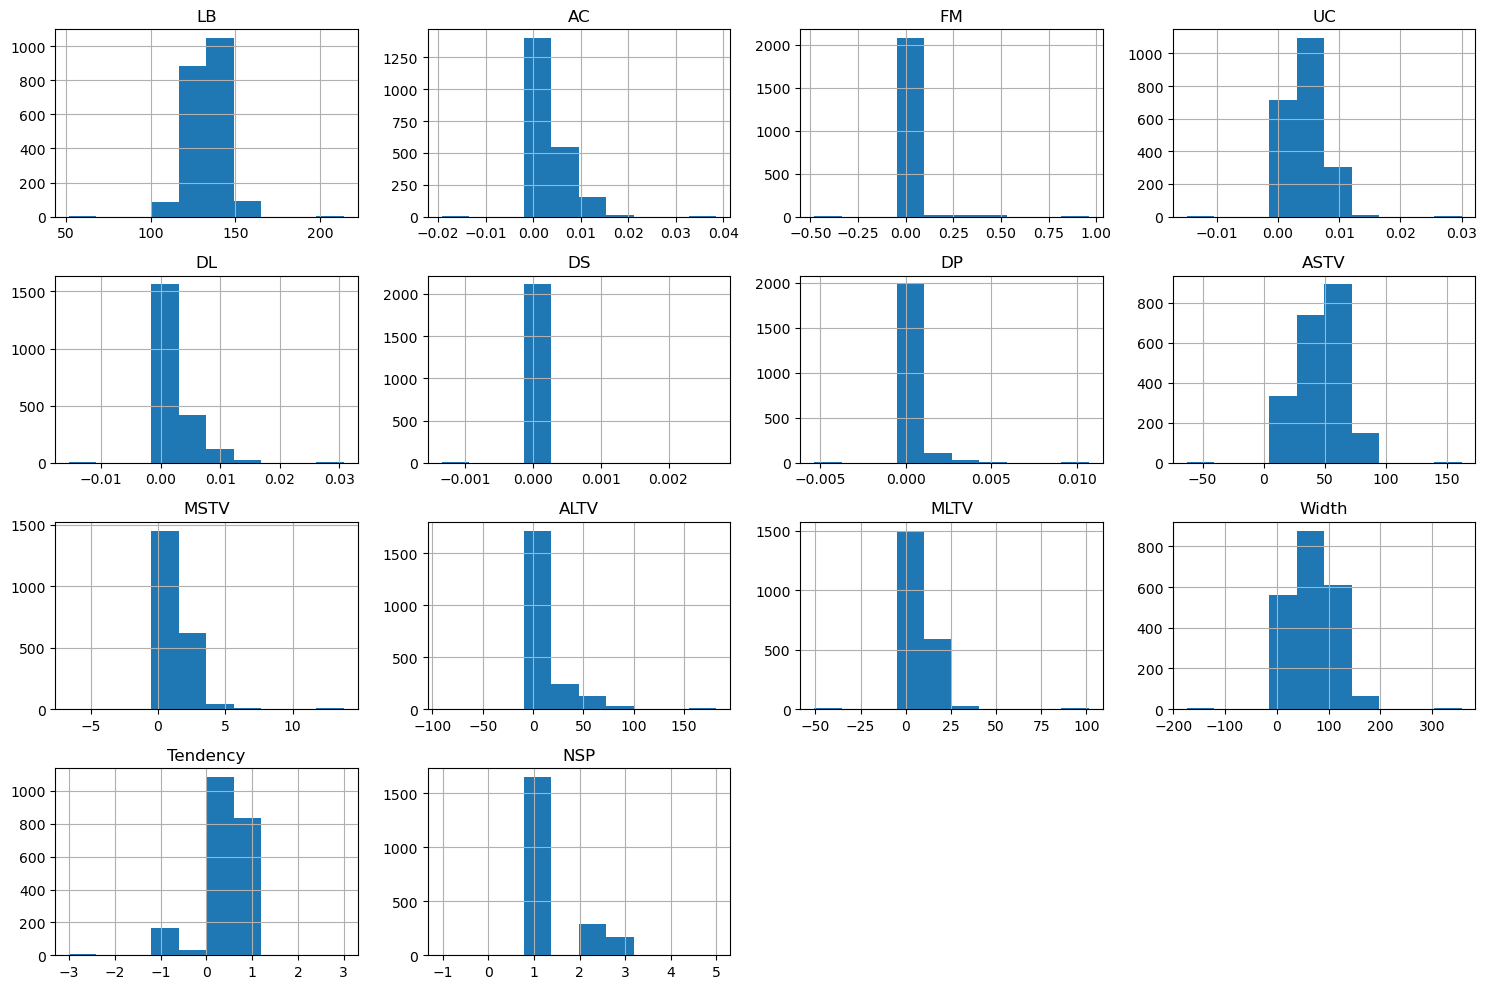

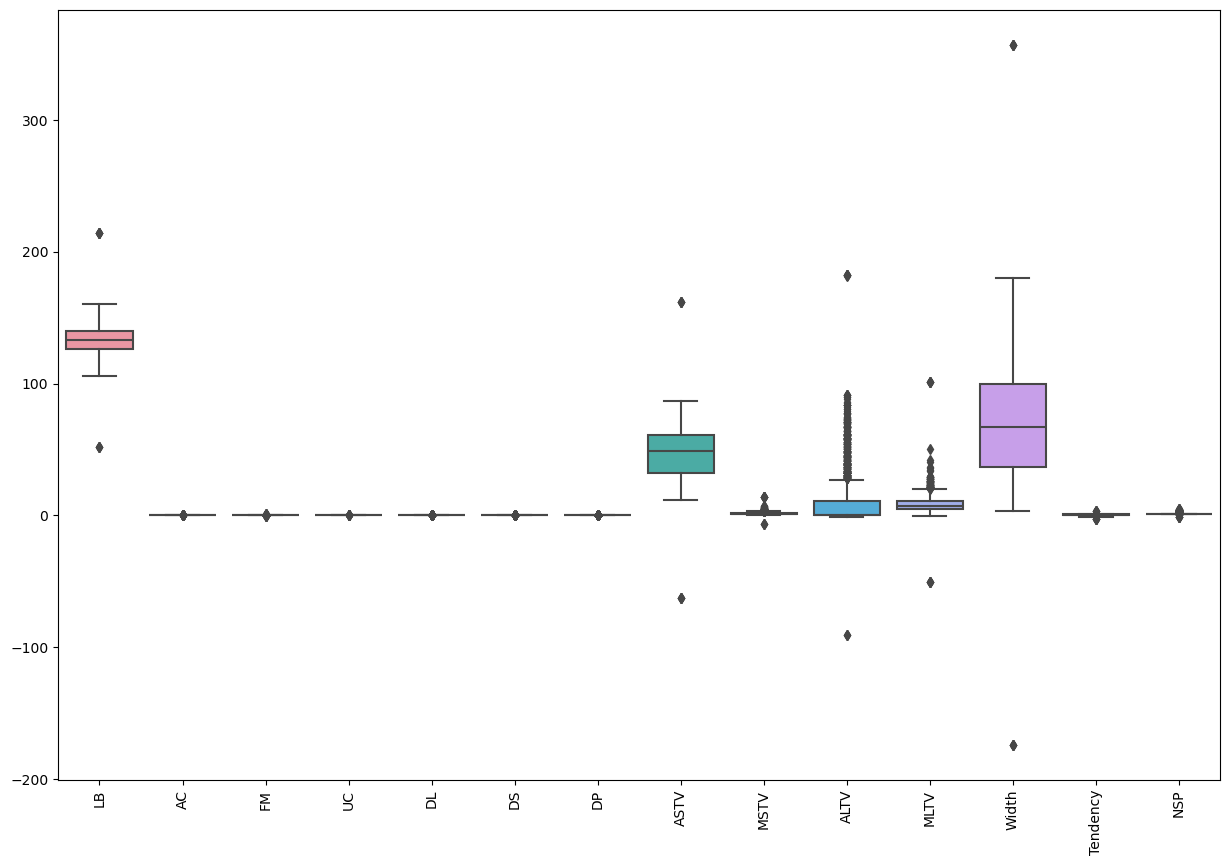

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


#### Bar charts or pie charts for categorical variables

In [12]:
# Bar charts (Example, assuming a categorical variable 'Category')
# sns.countplot(x='Category', data=df)
# plt.show()

# Pie charts
# df['Category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
# plt.show()


#### Scatter plots or correlation heatmaps

C:\ProgramData\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

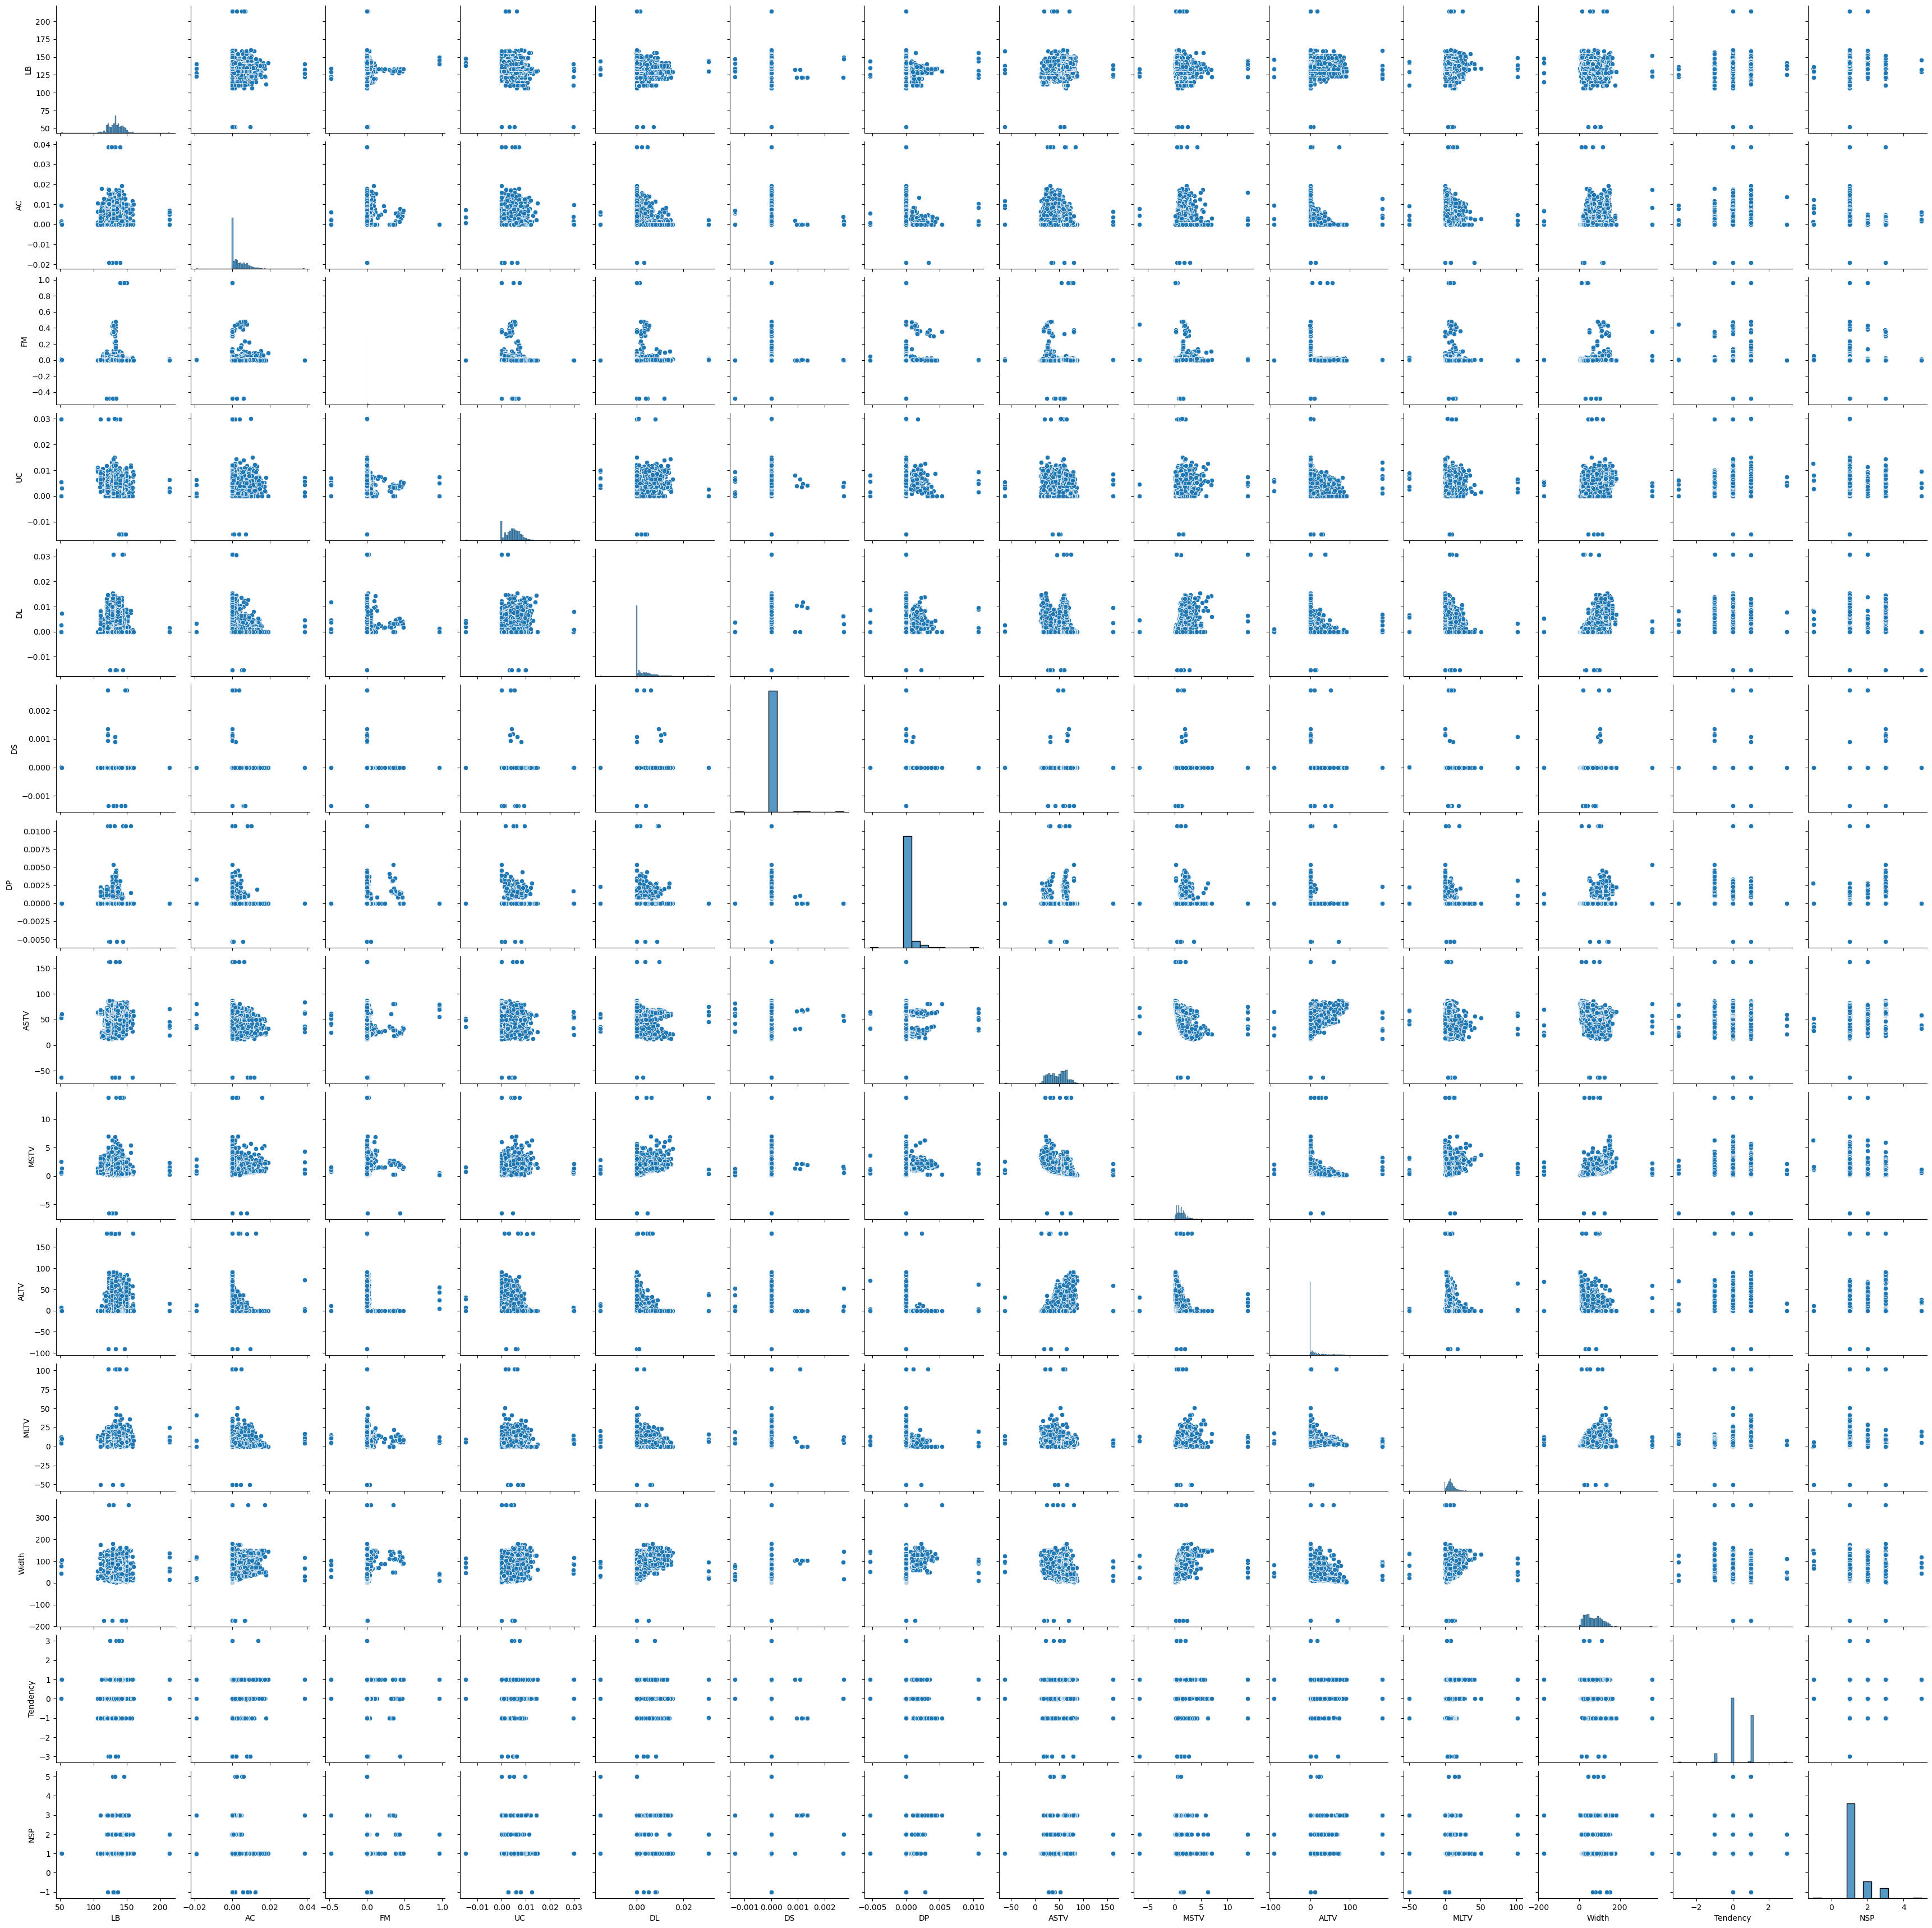

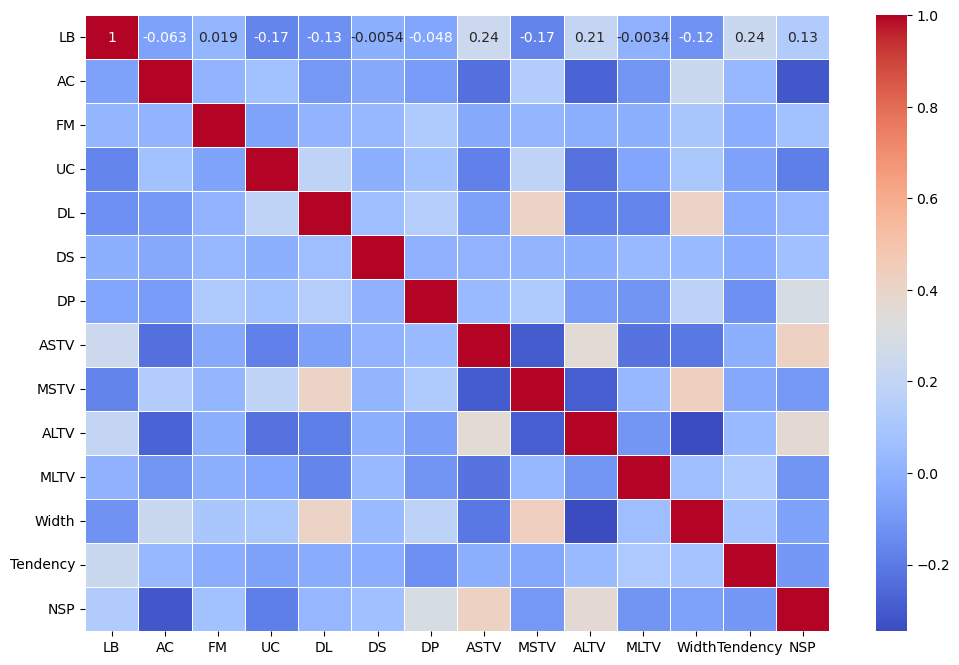

In [13]:
# Scatter plots
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


#### Advanced visualization techniques

C:\ProgramData\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

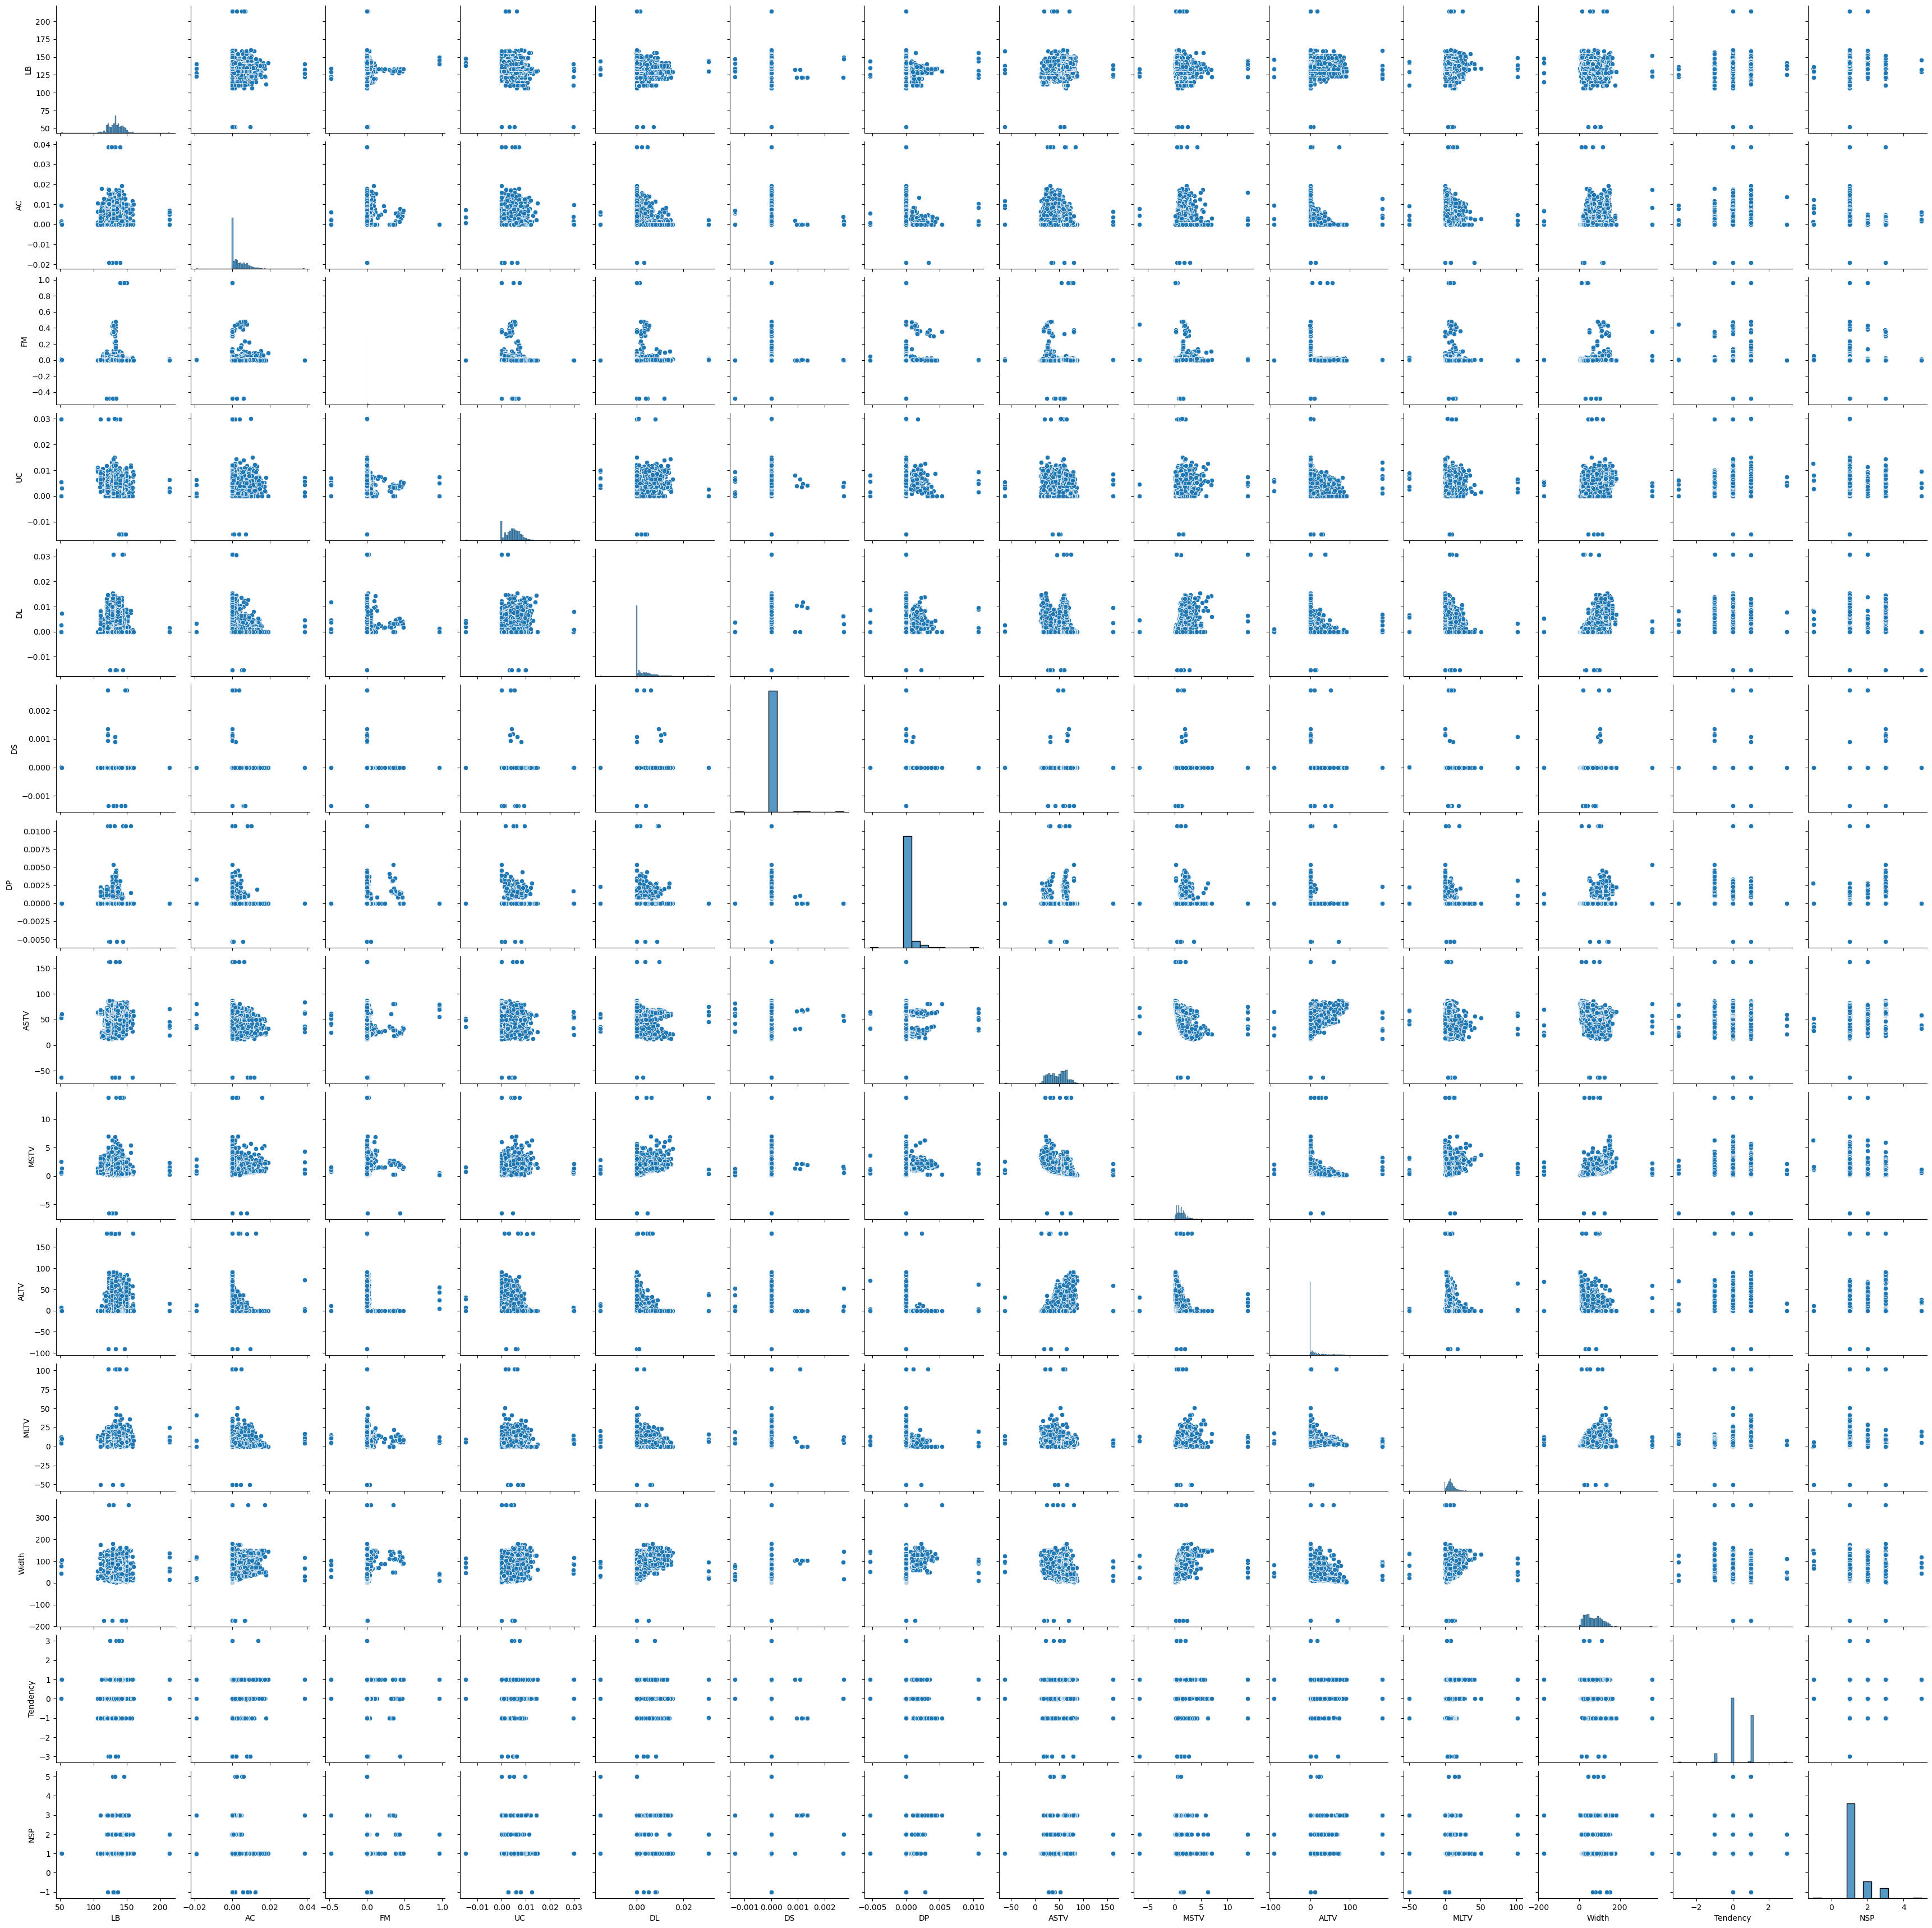

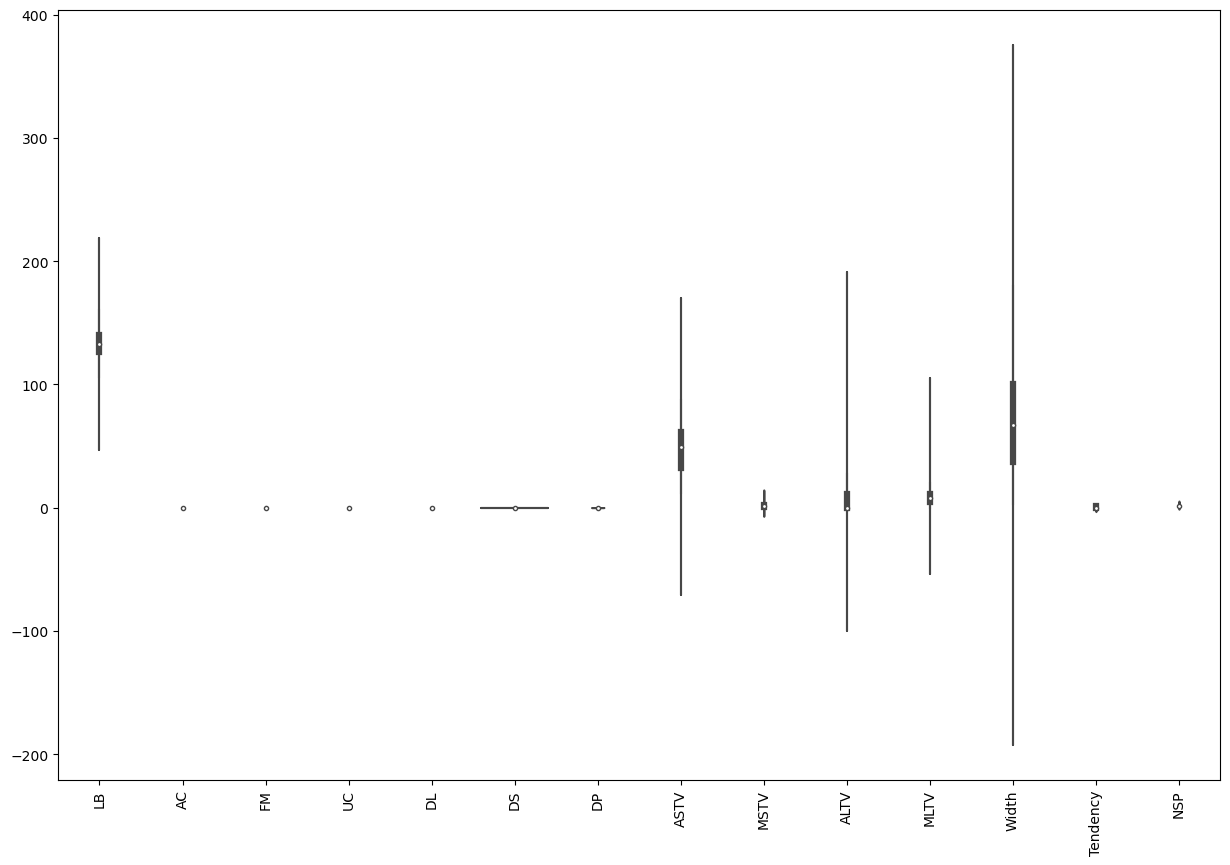

In [14]:
# Pair plots
sns.pairplot(df)
plt.show()

# Violin plots
plt.figure(figsize=(15, 10))
sns.violinplot(data=df)
plt.xticks(rotation=90)
plt.show()


## 4. Pattern Recognition and Insights

#### Identify correlations

In [16]:
# Correlation matrix
corr_matrix = df.corr()

# Display correlations above a certain threshold
high_corr = corr_matrix[corr_matrix.abs() > 0.7]
print(high_corr)


           LB   AC   FM   UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  Width  \
LB        1.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
AC        NaN  1.0  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
FM        NaN  NaN  1.0  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
UC        NaN  NaN  NaN  1.0  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DL        NaN  NaN  NaN  NaN  1.0  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DS        NaN  NaN  NaN  NaN  NaN  1.0  NaN   NaN   NaN   NaN   NaN    NaN   
DP        NaN  NaN  NaN  NaN  NaN  NaN  1.0   NaN   NaN   NaN   NaN    NaN   
ASTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   1.0   NaN   NaN   NaN    NaN   
MSTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   1.0   NaN   NaN    NaN   
ALTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   1.0   NaN    NaN   
MLTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   1.0    NaN   
Width     NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   

#### Look for trends or patterns over time

In [17]:
# Example code for temporal analysis
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
# df.resample('M').mean().plot()
# plt.show()


## 5. Conclusion


In this exploratory data analysis, we discovered the following key insights:
- There are significant correlations between [Variable A] and [Variable B], which may indicate...
- The distribution of [Variable C] is highly skewed, suggesting...
- [Any other significant patterns or trends]

These findings suggest that further analysis could focus on [Specific areas for further analysis].
